In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [2]:
class PCA():
    def __init__(self, dimensions=None):
        self.dimensions = dimensions
    
    def mat_mean(self, data):
        """Return the mean of data
        """
        return np.mean(data, axis=0)
    
    def convert_np(self, X):
        """Convert to numpy array format
        """
        return np.array(X).astype(np.float)
    
    def transform(self, X):
        X = self.convert_np(X)
        _mean = self.mat_mean(X)  # Get mean from matrix
        rows, columns = np.shape(X)
        if self.dimensions > columns:
            print "The data only have %s components, but reduced to %s components" % (columns, self.dimensions)
            return
        
        matrix_mean = np.tile(_mean, (rows, 1))  # Contrust mean matrix for X
        matrix_adjust = X - matrix_mean  # Adjust original data by the mean
        matrix_cov = np.cov(matrix_adjust.T)  # Cacl cov (must use matrix.T)
        eigenvalues, eigenvectors = np.linalg.eig(matrix_cov) # Cacl eigenvalues
        idx = np.argsort(-eigenvalues) # Sort by eigenvalues
        vector = np.matrix(eigenvectors.T[idx[:self.dimensions]]) # eigenvectors to the n dimension
        res_matrix = matrix_adjust * vector.T 
        return np.asarray([i.tolist()[0] for i in res_matrix]) # Matrix to array format
        

In [3]:
def load_data(file_name):
    """Load data as pandas dataframe
    """
    data = pd.read_csv(file_name, delimiter='\t', header=-1)
    # Split columns
    x = data.iloc[:, 0:-1]
    y = data.iloc[:, -1]
    return x, y

In [4]:
def color_mapping(x):
    """Map each x to a color number
    """
    map_ = dict()
    color_map = list()
    count = 0
    for i in x:
        if i not in map_:
            map_[i] = count
            count += 1
            color_map.append(map_[i])
        else:
            color_map.append(map_[i])

    return color_map

In [5]:
def draw_plt(data, color_map):
    plt.scatter(data[:, 0], data[:, 1], c=color_map)
    plt.show()

In [6]:
def draw_two_plt(dataA, color_mapA, dataB, color_mapB):
    plt.subplot(121)
    plt.scatter(dataA[:, 0], dataA[:, 1], c=color_mapA)
    plt.subplot(122)
    plt.scatter(dataB[:, 0], dataB[:, 1], c=color_mapB)
    plt.show()

In [7]:
def draw_three_plt(dataA, color_mapA, dataB, color_mapB, dataC, color_mapC):
    plt.subplot(131)
    plt.scatter(dataA[:, 0], dataA[:, 1], c=color_mapA)
    plt.subplot(132)
    plt.scatter(dataB[:, 0], dataB[:, 1], c=color_mapB)
    plt.subplot(133)
    plt.scatter(dataC[:, 0], dataC[:, 1], c=color_mapC)
    plt.show()

### 1. pca_a.txt dataset

In [9]:
pca = PCA(dimensions=2)
matrix_data, name = load_data('data/pca_a.txt')
data_pca = pca.transform(matrix_data)
color_map = color_mapping(name)
svd_res = TruncatedSVD(n_components=2).fit_transform(matrix_data)
tsne_res = TSNE(n_components=2).fit_transform(matrix_data)

### PCA of pca_a 

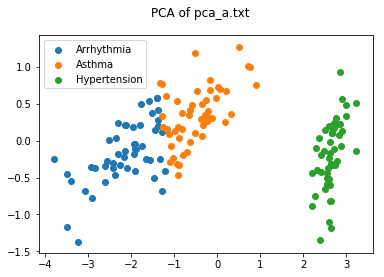

In [10]:
# https://stackoverflow.com/questions/47006268/matplotlib-scatter-plot-with-color-label-and-legend-specified-by-c-option
fig, ax = plt.subplots()
fig.suptitle('PCA of pca_a.txt')
for group in np.unique(name):
    idx = np.where(name == group)
    ax.scatter(data_pca[:, 0][idx], data_pca[:, 1][idx], label = group)
ax.legend()
plt.show()

### SVD of pca_a

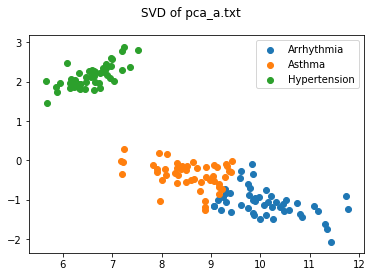

In [11]:
fig, ax = plt.subplots()
fig.suptitle('SVD of pca_a.txt')
for group in np.unique(name):
    idx = np.where(name == group)
    ax.scatter(svd_res[:, 0][idx], svd_res[:, 1][idx], label = group)
ax.legend()
plt.show()

### t-SNE of pca_a

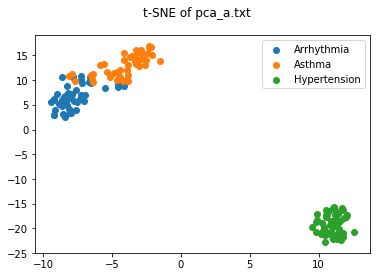

In [12]:
fig, ax = plt.subplots()
fig.suptitle('t-SNE of pca_a.txt')
for group in np.unique(name):
    idx = np.where(name == group)
    ax.scatter(tsne_res[:, 0][idx], tsne_res[:, 1][idx], label = group)
ax.legend()
plt.show()

### 2. pca_b.txt dataset

In [13]:
pca = PCA(dimensions=2)
matrix_data, name = load_data('data/pca_b.txt')
data_pca = pca.transform(matrix_data)
color_map = color_mapping(name)
svd_res = TruncatedSVD(n_components=2).fit_transform(matrix_data)
tsne_res = TSNE(n_components=2).fit_transform(matrix_data)

### PCA of pca_b 

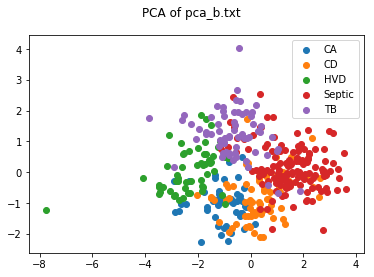

In [14]:
fig, ax = plt.subplots()
fig.suptitle('PCA of pca_b.txt')
for group in np.unique(name):
    idx = np.where(name == group)
    ax.scatter(data_pca[:, 0][idx], data_pca[:, 1][idx], label = group)
ax.legend()
plt.show()

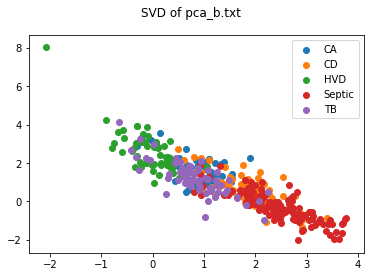

In [15]:
fig, ax = plt.subplots()
fig.suptitle('SVD of pca_b.txt')
for group in np.unique(name):
    idx = np.where(name == group)
    ax.scatter(svd_res[:, 0][idx], svd_res[:, 1][idx], label = group)
ax.legend()
plt.show()

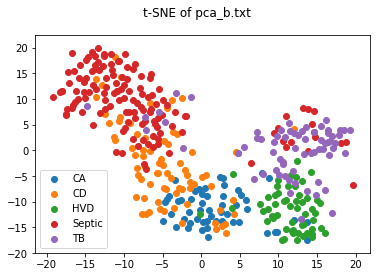

In [16]:
fig, ax = plt.subplots()
fig.suptitle('t-SNE of pca_b.txt')
for group in np.unique(name):
    idx = np.where(name == group)
    ax.scatter(tsne_res[:, 0][idx], tsne_res[:, 1][idx], label = group)
ax.legend()
plt.show()

### 3. pca_c.txt dataset

In [17]:
pca = PCA(dimensions=2)
matrix_data, name = load_data('data/pca_c.txt')
data_pca = pca.transform(matrix_data)
color_map = color_mapping(name)
svd_res = TruncatedSVD(n_components=2).fit_transform(matrix_data)
tsne_res = TSNE(n_components=2).fit_transform(matrix_data)

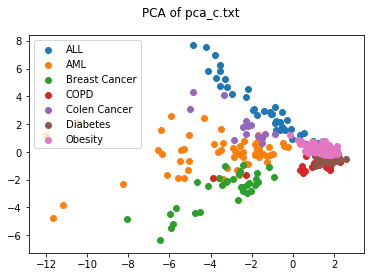

In [18]:
fig, ax = plt.subplots()
fig.suptitle('PCA of pca_c.txt')
for group in np.unique(name):
    idx = np.where(name == group)
    ax.scatter(data_pca[:, 0][idx], data_pca[:, 1][idx], label = group)
ax.legend()
plt.show()

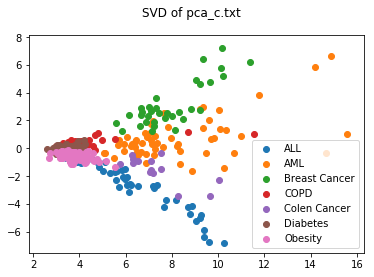

In [19]:
fig, ax = plt.subplots()
fig.suptitle('SVD of pca_c.txt')
for group in np.unique(name):
    idx = np.where(name == group)
    ax.scatter(svd_res[:, 0][idx], svd_res[:, 1][idx], label = group)
ax.legend()
plt.show()

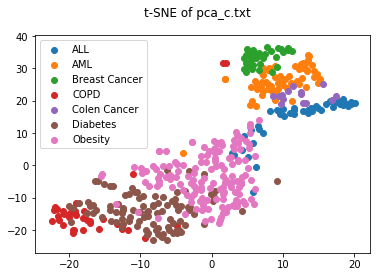

In [20]:
fig, ax = plt.subplots()
fig.suptitle('t-SNE of pca_c.txt')
for group in np.unique(name):
    idx = np.where(name == group)
    ax.scatter(tsne_res[:, 0][idx], tsne_res[:, 1][idx], label = group)
ax.legend()
plt.show()